In [32]:
import pandas as pd
import numpy as np

In [33]:
data=pd.read_csv('train.csv')

In [34]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [35]:
selected_columns = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice']
data=data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   2ndFlrSF      1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   HalfBath      1460 non-null   int64
 9   BedroomAbvGr  1460 non-null   int64
 10  KitchenAbvGr  1460 non-null   int64
 11  TotRmsAbvGrd  1460 non-null   int64
 12  GarageCars    1460 non-null   int64
 13  GarageArea    1460 non-null   int64
 14  SalePrice     1460 non-null   int64
dtypes: int64(15)
memory usage: 171.2 KB


In [36]:
data.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [37]:
data.shape

(1460, 15)

In [38]:
data=data.dropna()

In [39]:
data.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

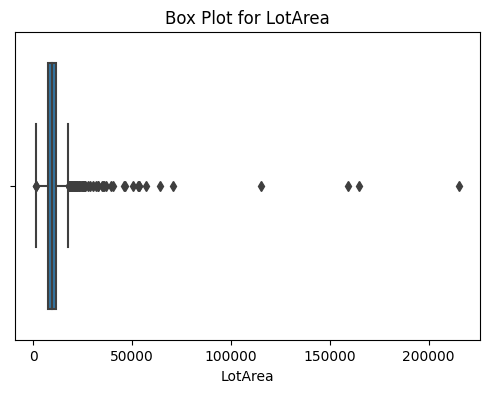

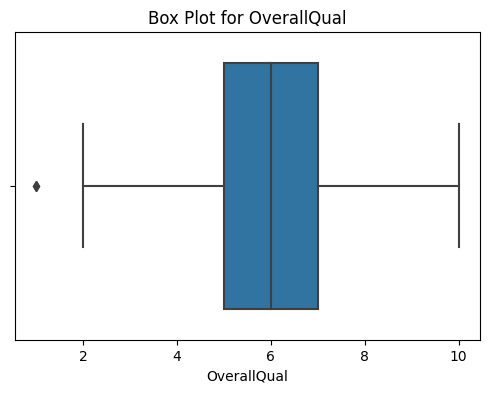

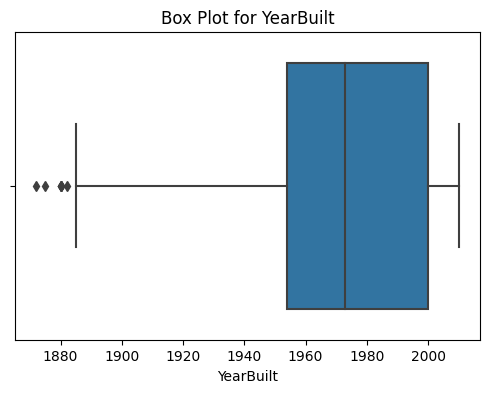

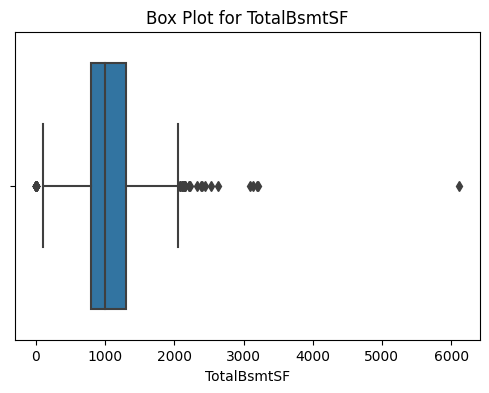

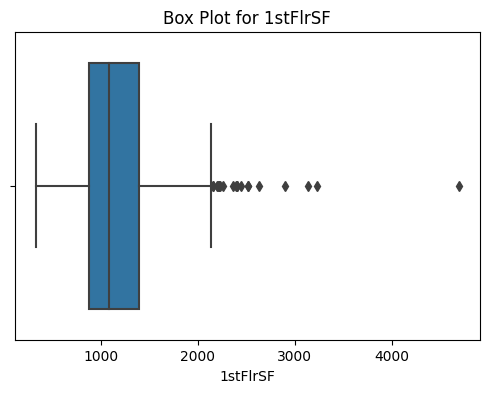

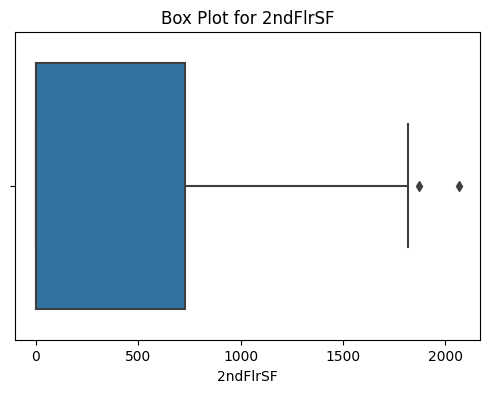

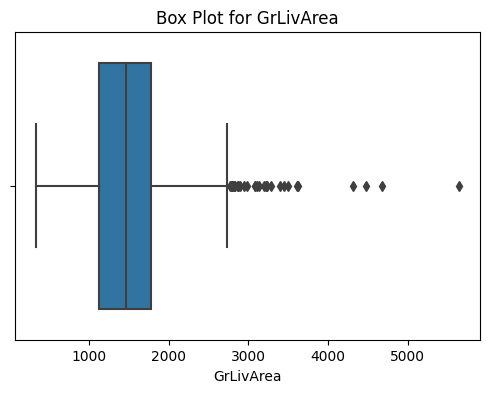

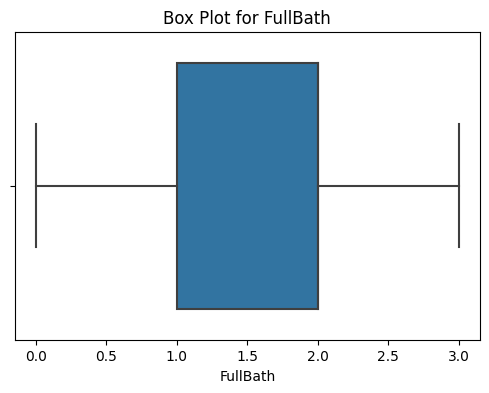

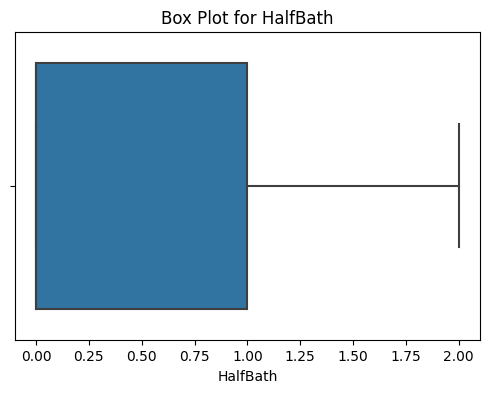

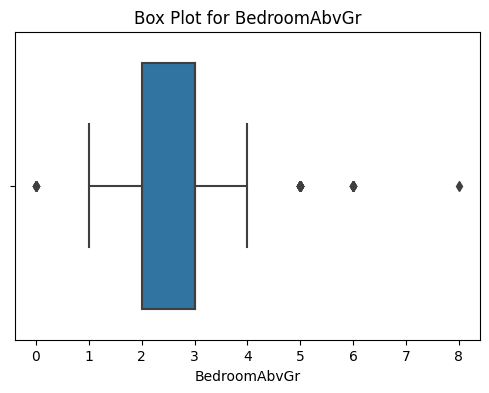

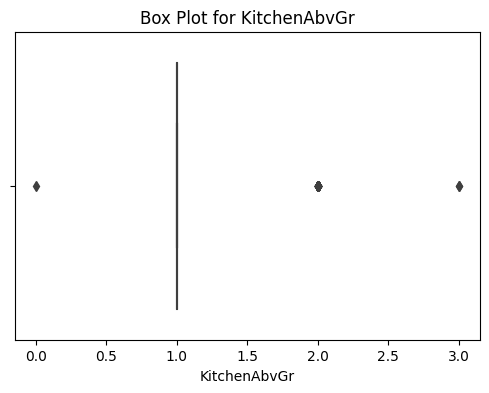

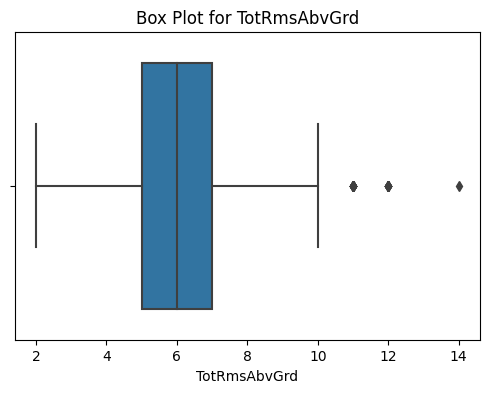

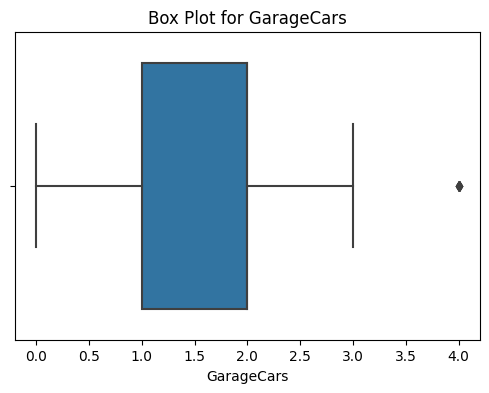

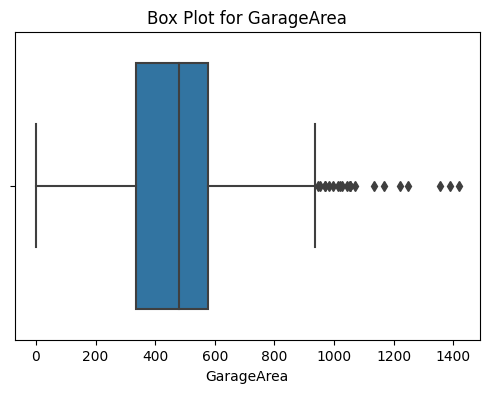

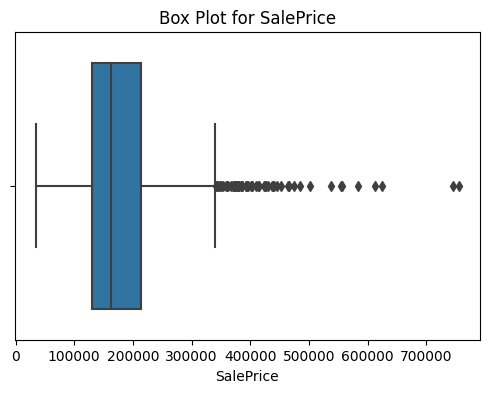

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each numeric column
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

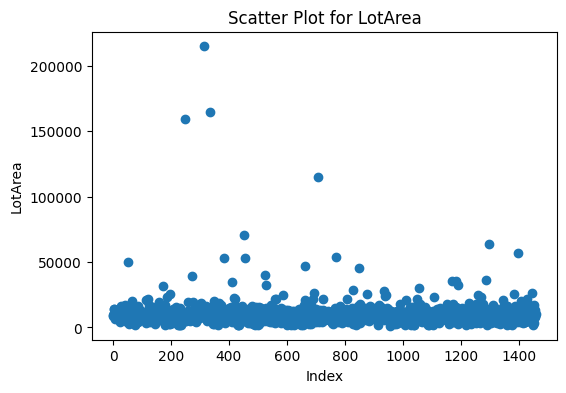

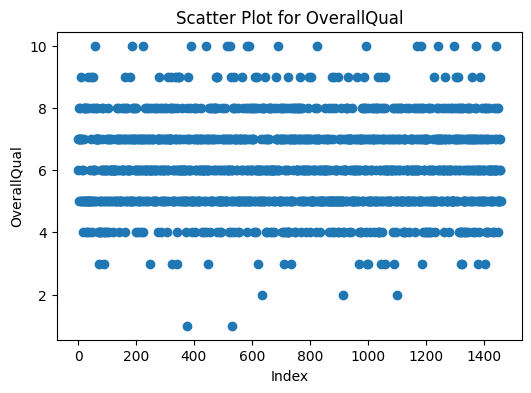

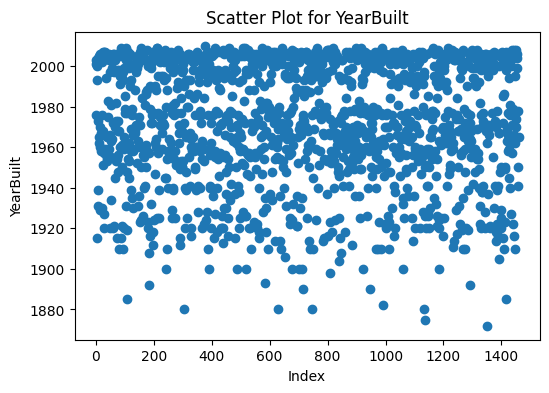

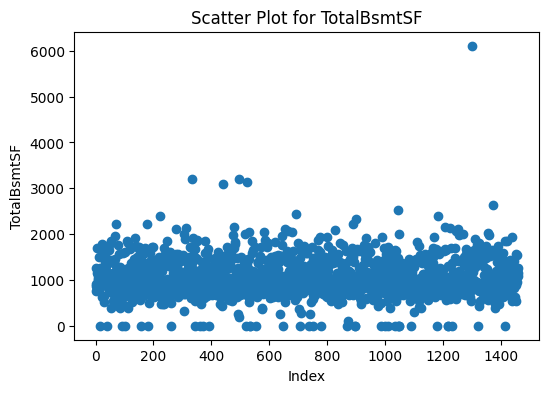

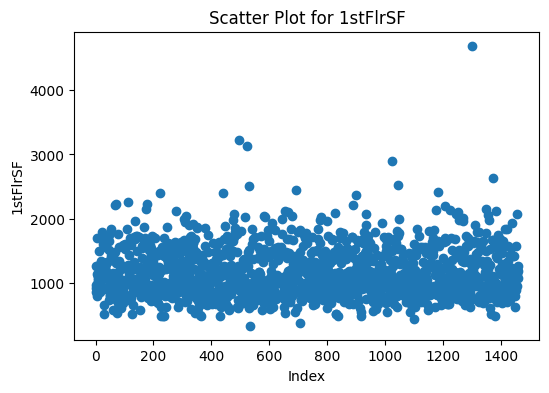

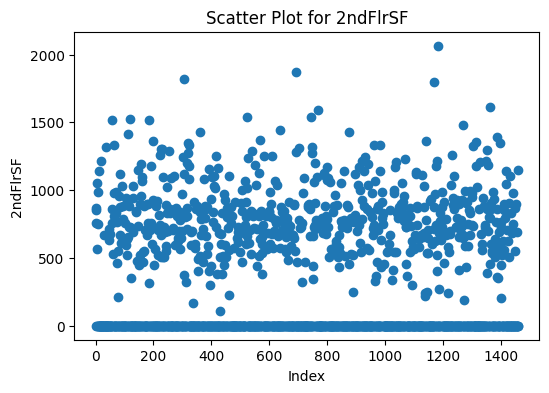

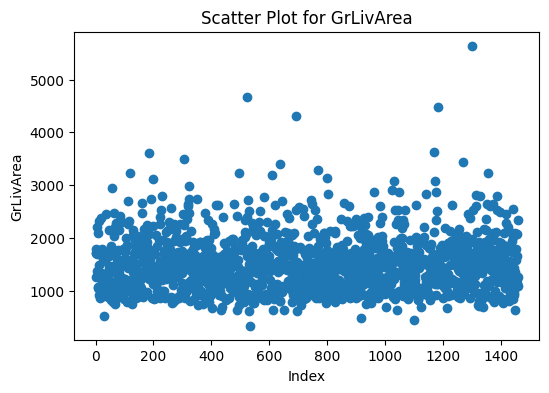

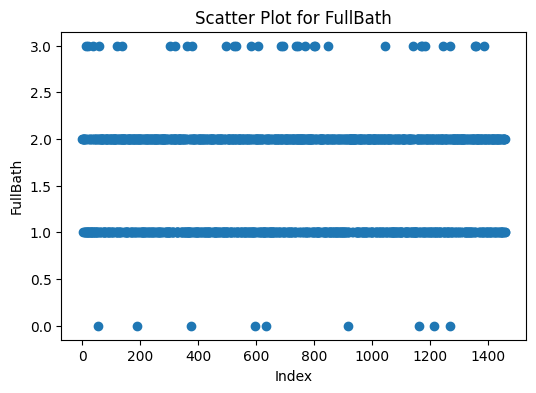

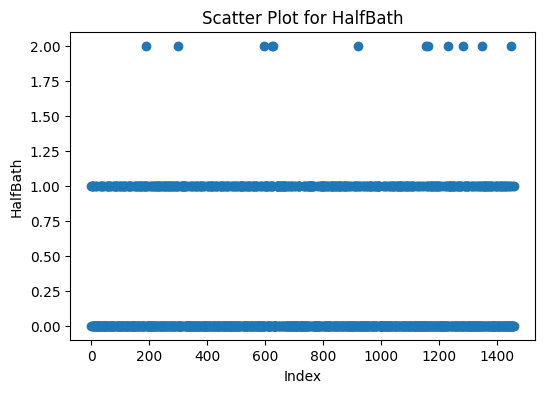

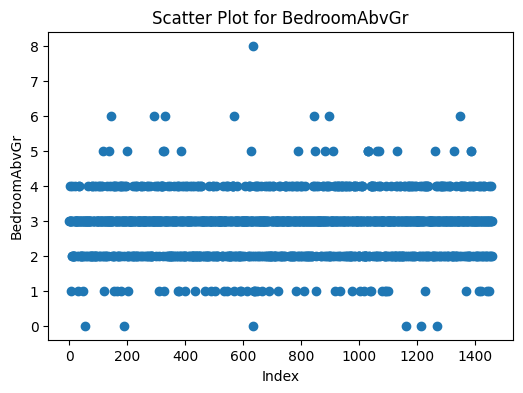

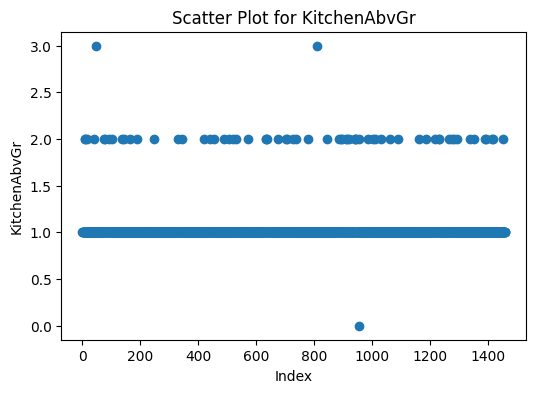

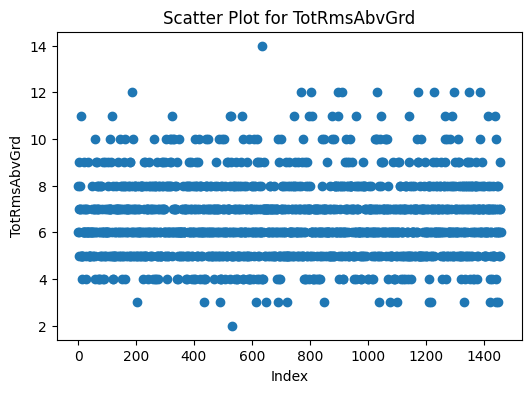

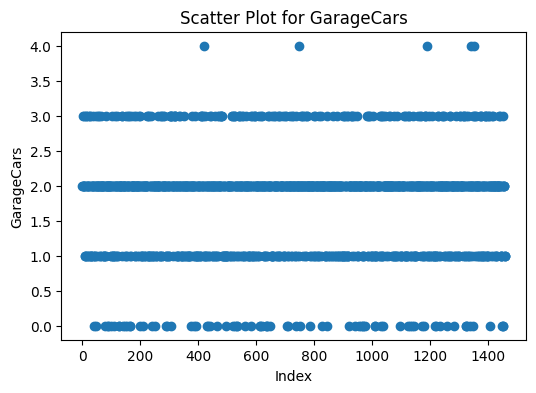

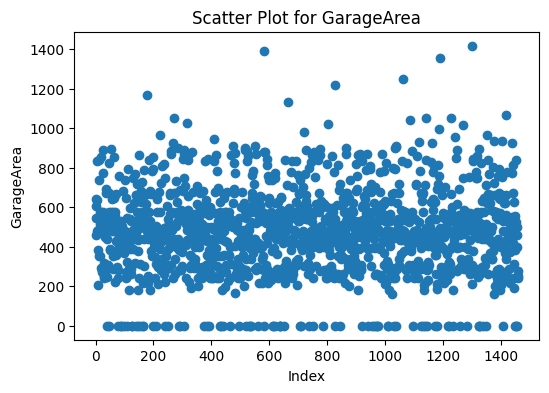

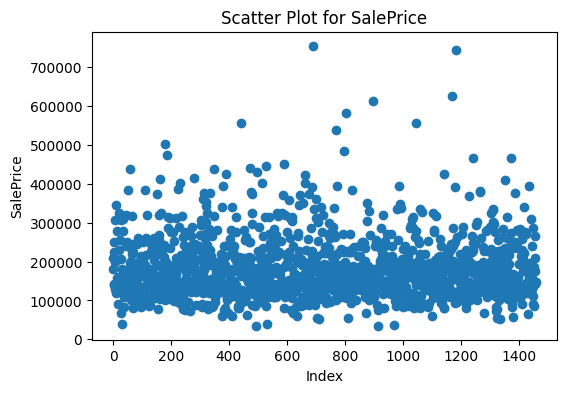

In [41]:
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(6, 4))
        plt.scatter(data.index, data[column])
        plt.title(f'Scatter Plot for {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X = data.drop(columns=['SalePrice'])  # Remove the target variable
y = data['SalePrice']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1449969134.12
R-squared: 0.81
